<a href="https://colab.research.google.com/github/Ishakasar/News-popularity-in-multiple-social-media-platforms/blob/main/Isha_Kasar_Team_4_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the news popularity in multiple social media platforms. </u></b>

## <b> Problem Description </b>

### This is a large data set of news items and their respective social feedback on multiple platforms: Facebook, Google+ and LinkedIn.The collected data relates to a period of 8 months, between November 2015 and July 2016, accounting for about 100,000 news items on four different topics: Economy, Microsoft, Obama and Palestine.


## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### IDLink (numeric): Unique identifier of news items
* ### Title (string): Title of the news item according to the official media sources
* ### Headline (string): Headline of the news item according to the official media sources
* ### Source (string): Original news outlet that published the news item
* ### Topic (string): Query topic used to obtain the items in the official media sources
* ### PublishDate (timestamp): Date and time of the news items' publication
* ### SentimentTitle (numeric): Sentiment score of the text in the news items' title
* ### SentimentHeadline (numeric): Sentiment score of the text in the news items' headline
* ### Facebook (numeric): Final value of the news items' popularity according to the social media source Facebook
* ### GooglePlus (numeric): Final value of the news items' popularity according to the social media source Google+
* ### LinkedIn (numeric): Final value of the news items' popularity according to the social media source LinkedIn


### VARIABLES OF SOCIAL FEEDBACK DATA

* ### IDLink (numeric): Unique identifier of news items
* ### TS1 (numeric): Level of popularity in time slice 1 (0-20 minutes upon publication)
* ### TS2 (numeric): Level of popularity in time slice 2 (20-40 minutes upon publication)
* ### TS... (numeric): Level of popularity in time slice ...
* ### TS144 (numeric): Final level of popularity after 2 days upon publication

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Data & Resources/News_Final.csv')

In [54]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [55]:
df.describe()

,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
count,93239.000000,93239.000000,93239.000000,93239.000000,93239.000000,93239.000000
mean,51560.653257,-0.005411,-0.027493,113.141336,3.888362,16.547957
std,30391.078704,0.136431,0.141964,620.173233,18.492648,154.459048
min,1.000000,-0.950694,-0.755433,-1.000000,-1.000000,-1.000000
25%,24301.500000,-0.079057,-0.114574,0.000000,0.000000,0.000000
50%,52275.000000,0.000000,-0.026064,5.000000,0.000000,0.000000
75%,76585.500000,0.064255,0.059709,33.000000,2.000000,4.000000
max,104802.000000,0.962354,0.964646,49211.000000,1267.000000,20341.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93239 entries, 0 to 93238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             93239 non-null  float64
 1   Title              93239 non-null  object 
 2   Headline           93224 non-null  object 
 3   Source             92960 non-null  object 
 4   Topic              93239 non-null  object 
 5   PublishDate        93239 non-null  object 
 6   SentimentTitle     93239 non-null  float64
 7   SentimentHeadline  93239 non-null  float64
 8   Facebook           93239 non-null  int64  
 9   GooglePlus         93239 non-null  int64  
 10  LinkedIn           93239 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 7.8+ MB


In [57]:
df.isnull().sum()

IDLink                 0
Title                  0
Headline              15
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


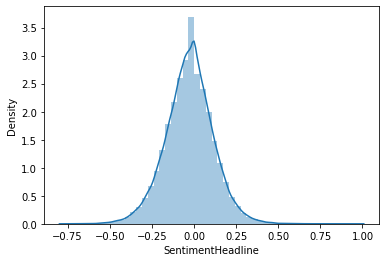

In [58]:
sns.distplot(df['SentimentHeadline'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


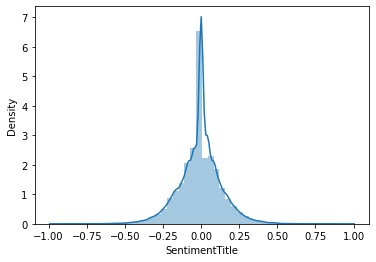

In [59]:
sns.distplot(df['SentimentTitle'])

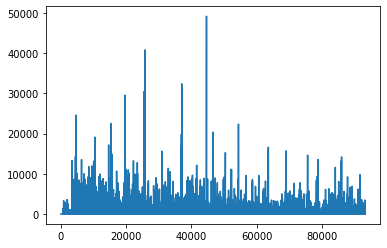

In [60]:
plt.plot(df['Facebook'])

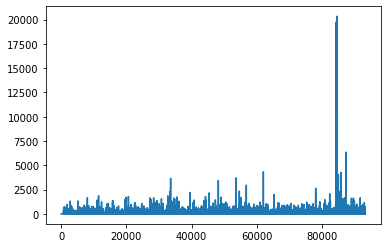

In [61]:
plt.plot(df['LinkedIn'])

In [62]:
df.dropna(inplace= True)

In [63]:
df.isna().sum()

IDLink               0
Title                0
Headline             0
Source               0
Topic                0
PublishDate          0
SentimentTitle       0
SentimentHeadline    0
Facebook             0
GooglePlus           0
LinkedIn             0
dtype: int64

In [64]:
df.drop(['IDLink','Source','PublishDate'], axis = 1, inplace= True)

In [65]:
df = pd.get_dummies(df, columns=['Topic'])

In [66]:
df.head()

,Title,Headline,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Topic_economy,Topic_microsoft,Topic_obama,Topic_palestine
0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,0.000000,-0.053300,-1,-1,-1,0,0,1,0
1,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",0.208333,-0.156386,-1,-1,-1,1,0,0,0
2,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",-0.425210,0.139754,-1,-1,-1,1,0,0,0
3,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,0.000000,0.026064,-1,-1,-1,1,0,0,0
4,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,0.000000,0.141084,-1,-1,-1,1,0,0,0


In [67]:
text_df= df['Title'].str.cat(df['Headline'], sep =" ")



In [68]:
text_df=pd.DataFrame(text_df, columns=['Title'])

In [69]:
text_df.head()

,Title
0,Obama Lays Wreath at Arlington National Cemete...
1,A Look at the Health of the Chinese Economy Ti...
2,Nouriel Roubini: Global Economy Not Back to 20...
3,Finland GDP Expands In Q4 Finland's economy ex...
4,"Tourism, govt spending buoys Thai economy in J..."


In [70]:
text_df.shape

(92945, 1)

In [71]:
text_df.head()

,Title
0,Obama Lays Wreath at Arlington National Cemete...
1,A Look at the Health of the Chinese Economy Ti...
2,Nouriel Roubini: Global Economy Not Back to 20...
3,Finland GDP Expands In Q4 Finland's economy ex...
4,"Tourism, govt spending buoys Thai economy in J..."


In [72]:
text_df.tail()

,Title
93234,Stocks rise as investors key in on US economy ...
93235,Russian PM proposes to use conservative and to...
93236,Palestinian Government Uses Foreign Aid To Pay...
93237,Palestine Youth Orchestra prepares for first U...
93238,Sausalito businesswoman wins $10000 in Microso...


In [73]:
data=text_df[:30000]

In [75]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
import string
from nltk.corpus import stopwords

In [77]:
punct = string.punctuation


In [78]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords])

In [79]:
!pip install -U spacy
!python -m spacy download en
!python -m spacy download en_core_web_sm

Requirement already up-to-date: spacy in /usr/local/lib/python3.6/dist-packages (2.3.5)
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [80]:
import spacy
from spacy import displacy
nlp= spacy.load('en_core_web_sm')

In [81]:
sent = nlp.create_pipe('sentencizer')
nlp.add_pipe(sent, before='parser')


In [99]:
text=('I am doing this just to test this spacy. It should revove things like """the and &quot')
doc=nlp(data[''])

In [100]:
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)
print(stopwords)


['afterwards', 'further', 'onto', 'themselves', 'already', 'fifty', 'part', 'those', 'whether', 'which', 'without', 'very', '’d', 'anyway', 'nor', 'into', 'often', 're', 'too', 'thru', 'one', 'quite', 'empty', 'less', 'least', 'within', 'say', "'ll", 'again', 'she', 'whenever', 'get', 'off', 'but', 'formerly', 'per', 'should', 'whereby', 'several', 'will', 'throughout', 'elsewhere', 'four', 'beyond', 'because', 'show', 'itself', 'therein', 'ever', 'seemed', 'thereupon', 'name', 'these', 'otherwise', 'back', 'a', 'to', 'unless', 'wherever', 'whither', 'hundred', 'became', 'down', 'forty', 'about', 'namely', 'something', 'their', 'via', 'sixty', 'latter', 'just', 'ten', 'using', 'never', 'own', 'they', 'only', 'call', 'n’t', 'thereafter', 'so', 'still', 'by', 'few', 'once', 'would', '‘ll', 'mine', 'no', 'although', 'on', 'everyone', 'above', 'might', 'side', 'though', 'move', 'hereupon', 'behind', 'before', 'during', 'make', 'when', 'due', 'myself', 'ours', 'himself', 'our', 'put', 'more

In [101]:
import string
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [109]:
for token in doc:
  print(token)

I
am
doing
this
just
to
test
this
spacy
.
It
should
revove
things
like
"
"
"
the
and
&
quot


In [110]:
for sent in doc.sents:
    print(sent)

I am doing this just to test this spacy.
It should revove things like """the and &quot


In [111]:
for token in doc:
    if token.is_stop == False:
        print(token)

test
spacy
.
revove
things
like
"
"
"
&
quot


In [112]:

for lem in doc:
    print(lem.text, lem.lemma_)

I -PRON-
am be
doing do
this this
just just
to to
test test
this this
spacy spacy
. .
It -PRON-
should should
revove revove
things thing
like like
" "
" "
" "
the the
and and
& &
quot quot


In [113]:

for token in doc:
    print(token.text, token.pos_)

I PRON
am AUX
doing VERB
this DET
just ADV
to PART
test VERB
this DET
spacy NOUN
. PUNCT
It PRON
should VERB
revove VERB
things NOUN
like SCONJ
" PUNCT
" PUNCT
" PUNCT
the DET
and CCONJ
& CCONJ
quot PROPN


In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)


In [94]:
X

<30000x30518 sparse matrix of type '<class 'numpy.float64'>'
	with 551807 stored elements in Compressed Sparse Row format>

In [95]:
df1=pd.DataFrame(X.todense(), columns= tfidf.get_feature_names())

In [96]:
min(tfidf.get_feature_names())

'"""the'

In [97]:
df1

,"""""""the",'&quot,'em,+0.00,+0.45,+0.5,+0.65,+0.83,+0.98,+1.1,+1.2,+1.4,+1.82,+13,+2.9,+3,+3.77,+30,+4.91,",&quot",-'5,-(ammoland.com)-,--,---,--analyst,--gop,-0.27,-0.61,-0.77,-0.90,-1.04,-1.16,-1.32,-1.38,-1.77,-1.85,-1.89,-1.92,-16.0,-22.03,...,total,uae,ultimate,very,vodafone,war,we,we're,what,who,why,window,witnessing,world,worth,you,zombie,1299,c,,£,¦,©,­congress,®,»,à,ángel,â,âshare,â€,–,—,’,“i,•,•microsoft,…,€,™
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
df1.shape

(30000, 30518)